In [1]:
import matplotlib.pyplot as plt
from tqdm import * #progress bar
from sccm import CryptoCurrencyModel, PaperModel
from sccm.agents import *
from sccm._parameters import Parameters
from sccm.market import Order
from mesa.batchrunner import BatchRunner
import numpy as np
import pandas as pd
#import pandas_montecarlo


In [2]:
br = BatchRunner(PaperModel,
                        parameter_values={},
                        iterations=5,
                        max_steps=365*5,
                        model_reporters={"Data Collector": lambda m: m.datacollector})

In [3]:
br.run_all()

100%|██████████| 5/5 [01:47<00:00, 21.96s/it]


In [4]:
dfs = [b.get_model_vars_dataframe() for b in br.get_model_vars_dataframe()["Data Collector"]]

In [5]:
mc = pd.concat(dfs).groupby(level=0).mean() #put rows on top of each other and do mean of rows with same index

In [6]:
gini = mc

In [7]:
def plotdata(l, lg=False):
    gini[l].plot(logy=lg)
    plt.legend(l)
    plt.show()

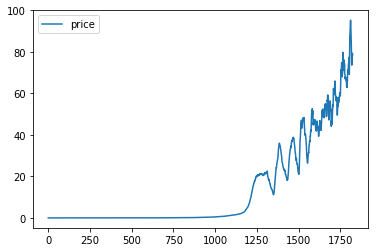

In [8]:
for p in ['price']:#, 'weighted_avg_price']:
    plotdata([p])

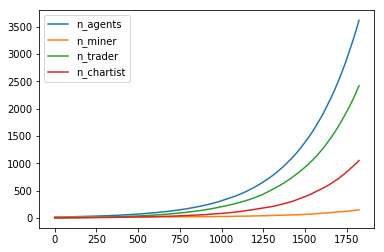

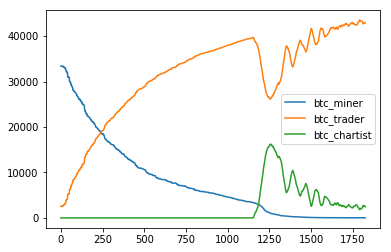

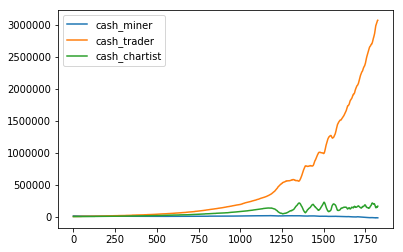

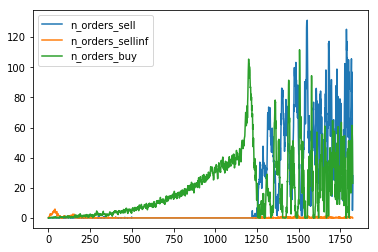

In [9]:
plotdata(['n_agents', 'n_miner', 'n_trader', 'n_chartist'])
plotdata(['btc_miner', 'btc_trader', 'btc_chartist'])
plotdata(['cash_miner', 'cash_trader', 'cash_chartist'])
plotdata(['n_orders_sell', 'n_orders_sellinf', 'n_orders_buy'])

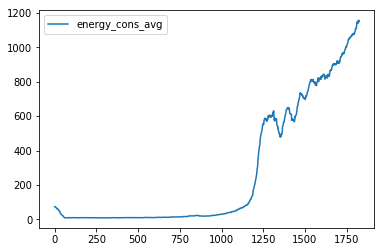

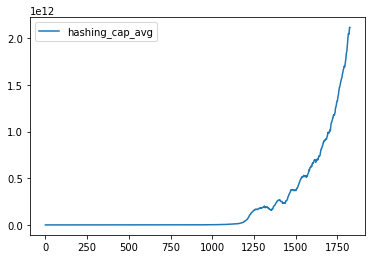

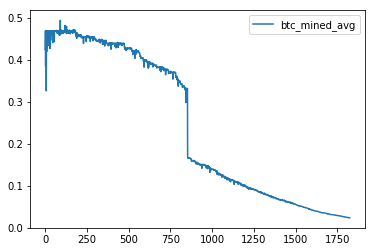

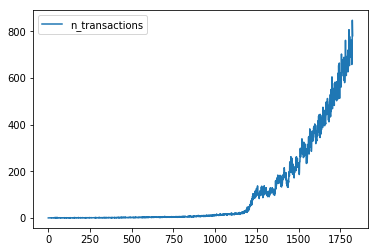

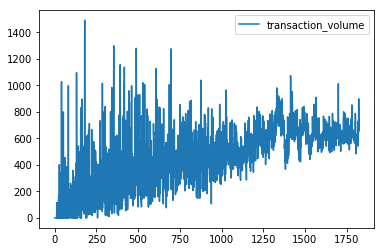

In [10]:
for p in ['energy_cons_avg', 'hashing_cap_avg','btc_mined_avg', 'n_transactions', 'transaction_volume']:#,'electricity_cost', 'hardware_bought']:
    plotdata([p])

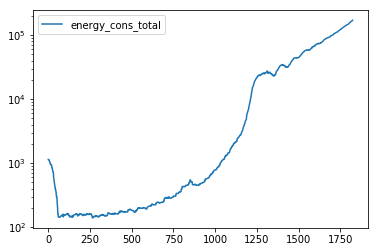

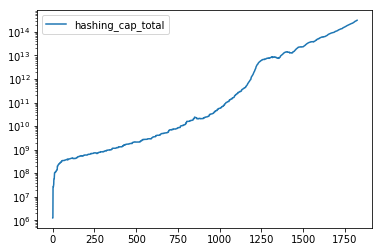

In [11]:
for p in ['energy_cons_total', 'hashing_cap_total']:
    plotdata([p],lg=True)

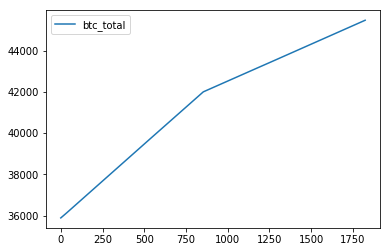

In [12]:
gini[['btc_miner', 'btc_trader', 'btc_chartist']].sum(axis=1).plot()
plt.legend(['btc_total'])
plt.show()

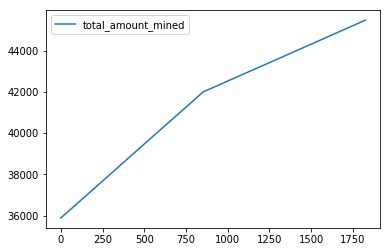

In [13]:
plotdata(['total_amount_mined'])

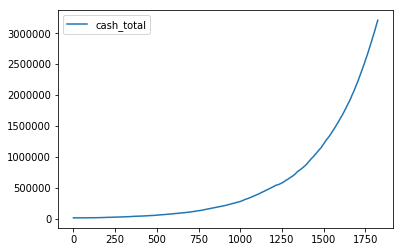

In [14]:
gini[['cash_miner', 'cash_trader', 'cash_chartist']].sum(axis=1).plot()
plt.legend(['cash_total'])
plt.show()

In [15]:
def getsum6(p):
    dat = list(gini[p])
    n = len(dat)
    m = int(np.floor(n/6))
    k = 6*m
    return np.array(dat[:k]).reshape(m, 6).sum(axis=1)

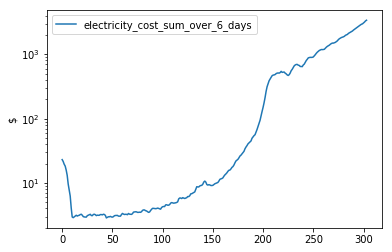

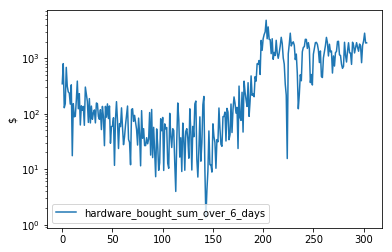

In [16]:
for p in ['electricity_cost', 'hardware_bought']:
    plt.semilogy(getsum6(p))
    plt.legend([p+'_sum_over_6_days'])
    plt.ylabel('$')
    plt.show()